 # a. Data Loading

#### Reading the student performance dataset into a Pandas DataFrame. This allows for structured data manipulation and analysis.

In [30]:
import pandas as pd
df=pd.read_csv("student-mat.csv",sep=";")

#### Previewing the first five rows of the dataset. This helps in understanding its structure and identifying key columns.

In [31]:
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


# b. Data Exploration

#### Identifying columns with missing values. This helps determine if data cleaning is needed before analysis.

In [37]:
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


#### Checking the data types of each column to ensure compatibility for calculations.

In [38]:
print(df.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


#### Displaying the total number of rows and columns. This provides insight into the dataset's scale and complexity.

In [39]:
print(df.shape)

(395, 33)


# c. Data Cleaning

#### Replacing missing values with the median or removing rows to maintain data consistency. Ensures completeness in analysis. Eliminating duplicate rows to avoid redundancy. This helps in maintaining accurate and reliable insights.

In [40]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.drop_duplicates(inplace=True)

In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         0 non-null      float64
 2   age         0 non-null      float64
 3   address     0 non-null      float64
 4   famsize     0 non-null      float64
 5   Pstatus     0 non-null      float64
 6   Medu        0 non-null      float64
 7   Fedu        0 non-null      float64
 8   Mjob        0 non-null      float64
 9   Fjob        0 non-null      float64
 10  reason      0 non-null      float64
 11  guardian    0 non-null      float64
 12  traveltime  0 non-null      float64
 13  studytime   0 non-null      float64
 14  failures    0 non-null      float64
 15  schoolsup   0 non-null      float64
 16  famsup      0 non-null      float64
 17  paid        0 non-null      float64
 18  activities  0 non-null      float64
 19  nursery     0 non-null      f

# d. Data Analysis

#### Calculating the mean final grade (G3) to determine the overall student performance.

In [41]:
import numpy as np
average = np.mean(df["G3"])
print(average)

10.415189873417722


#### Counting students who achieved a final grade higher than 15 to assess high performers.

In [42]:
high = (df["G3"] > 15).sum()
print(high)

40


#### Analyzing the relationship between study time and final grades to see if more study leads to better scores.

In [44]:
correlation = df["studytime"].corr(df["G3"])
print(correlation)

0.0978196896531963


#### Comparing the average final grades of male and female students to identify performance differences.

In [45]:
gender_avg = df.groupby("sex")["G3"].mean()
print(gender_avg)

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


In [47]:
higher_gender = "Male" if gender_avg["M"] > gender_avg["F"] else "Female"
print(higher_gender)

Male


# e. Data Visualization

#### Visualizing the distribution of students' final grades (G3) using a histogram. This helps identify trends such as common scores and overall performance spread.

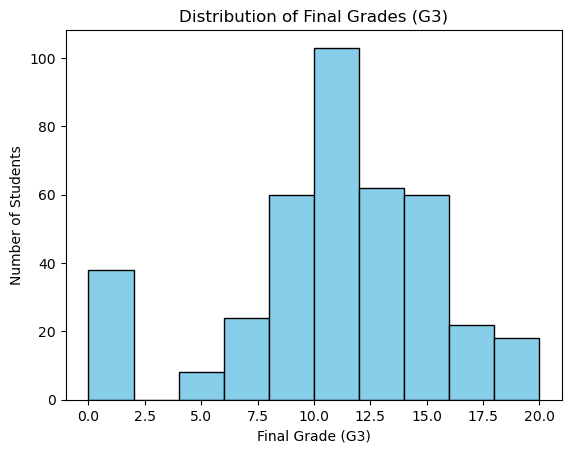

In [48]:
import matplotlib.pyplot as plt

df = pd.read_csv("student-mat.csv")  
df["G3"] = pd.to_numeric(df["G3"], errors="coerce")  

plt.hist(df["G3"], bins=10, color="skyblue", edgecolor="black")  
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.title("Distribution of Final Grades (G3)")
plt.show()

#### Plotting study time against final grades to observe any correlation. This helps determine if increased study time leads to better performance.

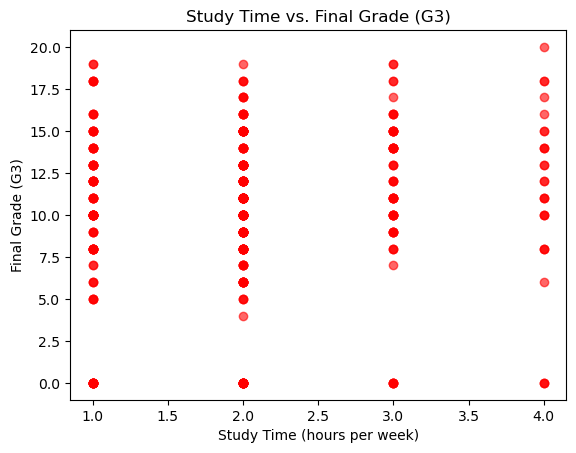

In [49]:
df = pd.read_csv("student-mat.csv")  
df["G3"] = pd.to_numeric(df["G3"], errors="coerce") 
df["studytime"] = pd.to_numeric(df["studytime"], errors="coerce")  
df = df.dropna(subset=["G3", "studytime", "sex"]) 


plt.scatter(df["studytime"], df["G3"], color="red", alpha=0.6)
plt.xlabel("Study Time (hours per week)")
plt.ylabel("Final Grade (G3)")
plt.title("Study Time vs. Final Grade (G3)")
plt.show()

#### Comparing the average final grades (G3) of male and female students using a bar chart. This helps analyze gender-based performance differences.

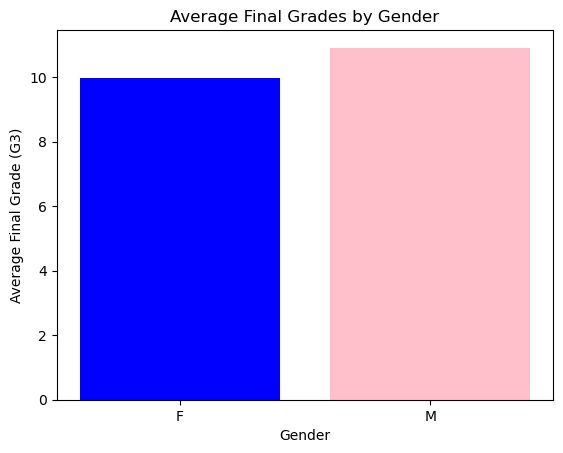

In [50]:
avg_scores = df.groupby("sex")["G3"].mean()
plt.bar(avg_scores.index, avg_scores, color=["blue", "pink"])
plt.xlabel("Gender")
plt.ylabel("Average Final Grade (G3)")
plt.title("Average Final Grades by Gender")
plt.show()